<a href="https://colab.research.google.com/github/Junereals/training/blob/main/ChemProjects1-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1.



---
Molecular weight from formula.

Input: str with molecular formula

Output: its molecular weight

In [ ]:
import pandas
import re

Using re pattern finding function, created dictionary with atoms as keys and number of atoms as values:

In [ ]:
mol = input()
atoms_with_numbers = re.findall(r'([A-Z][a-z]*)(\d*)',mol)
mols = {}
for atoms, numbers in atoms_with_numbers:
  if atoms:
    mols[atoms]= mols.get(atoms,0)+int(numbers) if numbers!='' else mols.get(atoms,0)+1

Parsing dataframe from article with a table containing atom weights using pandas function and assigning index to atoms:

In [ ]:
atom_weight = pandas.DataFrame(*pandas.read_html('https://www.tdsm.ru/article/view/okruglennye-znacenia-otnositelnyh-atomnyh-mass-himiceskih-elementov'))
atom_weight = atom_weight[atom_weight.index!=0]
atom_weight.index=atom_weight[0]
atom_weight=pandas.DataFrame(atom_weight[2],index=atom_weight.index)
atom_weight.columns = ['weight']

Summed up the atom weights by the amounts, the result is rounded to 1 digit

In [ ]:
sum = 0
for atom, number in mols.items():
  sum +=int(atom_weight['weight'][atom])/1000*number
print(round(sum,1))

# Project 2.



---
Chemical reaction balancer.

Input: reaction "a + b + ... + n = A + ... + N"

Output: reaction with the correct balance

Let's convert parsing of the str molecular formula into the function we can use:

In [ ]:
def atoms_from_str(molecule: str):
  atoms_with_numbers = re.findall(r'([A-Z][a-z]*)(\d*)',molecule)
  mols = {}
  for atoms, numbers in atoms_with_numbers:
    if atoms:
     mols[atoms]= mols.get(atoms,0)+int(numbers) if numbers!='' else mols.get(atoms,0)+1
  return mols

Input gives us reaction in the pattern of "mol1 + mol2 + ... + moln = Mol1 + Mol2 + ... + Moln". To balance that, we must count the amount of atoms on the right and left side and look for the minimal indexes to make them equal.

In [363]:
reaction = input()
left_side, right_side =[i.split(' + ') for i in reaction.split(' = ')]


H2O + Na = H2 + NaOH


Here we'll create list matrixes, where matrix A contains number of atoms from mol1-mol n with positive amounts and Mol1-Mol(N-1) with negative ones. Basicaly, we transfered all of the molecules, exept for the very last one to the left and created a matrix A with the left side and matrix B with the right.

In [364]:
import numpy as np
left_dict, right_dict=[atoms_from_str(i) for i in left_side], [atoms_from_str(i) for i in right_side]
atoms_names = []
for i in right_dict:
  atoms_names+=i.keys()
atoms_names=tuple(set(atoms_names))
all_dict = left_dict+[{a: (-b) for a,b in i.items()} for i in right_dict]
matrixA = [[j.get(i,0) for j in all_dict[:-1]] for i in atoms_names]
matrixB = [-all_dict[-1].get(i,0) for i in atoms_names]

Lets solve this system of equations keeping in mind that the coef. by the last molecule is 1. Afterwards, we will multiply all of the numbers till every single one of them is an integer. We'll find the solutions with numpy's lstsq function that finds the least-squares solution that we need. Then we will use fractions to find least common multiple (from maths) for the denominators if needed.

In [360]:
from math import lcm
from functools import reduce
from fractions import Fraction

In [365]:
A = np.array(matrixA)
B = np.array(matrixB)
answer = np.linalg.lstsq(A,B)[0]

answer = list(map(lambda s: Fraction(s).limit_denominator(1000),answer))
answer_denom = [a.denominator for a in answer]
coef = 1

if not all(map(lambda k: k.denominator==1, answer)):
    coef = reduce(lcm, answer_denom)
answer = [int(f.numerator * coef / f.denominator) for f in answer+[1]]

In [366]:
end_coef = dict(zip(left_side+right_side,answer))
print(*[str(end_coef[i])+' '+i for i in left_side], sep=' + ', end=' ')
print('=', end=' ')
print(*[str(end_coef[i])+' '+i for i in right_side], sep=' + ')

2 H2O + 2 Na = 1 H2 + 2 NaOH


# Project 3.



---
3D molecular modeling


In [3]:
pip install py3Dmol

In [4]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 26.8 MB/s eta 0:00:00


In [12]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

In [14]:
mol = Chem.MolFromSmiles(input("Input SMILES formula:"))
view = py3Dmol.view()
mol = Chem.AddHs(mol, addCoords=True)
Chem.AllChem.EmbedMolecule(mol, Chem.AllChem.ETKDG())
Chem.AllChem.UFFOptimizeMolecule(mol)
mol = Chem.MolToMolBlock(mol)
view.addModel(mol)
view.setStyle({'stick' : {'colorscheme' : 'greyCarbon'}}, viewer=(0,0))
view.render()

KeyboardInterrupt: Interrupted by user

#Project 4.

Display spectral data with local min and max

In [130]:
import matplotlib
import seaborn

Creating rondom spectral data to display

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_dummy_spectral_data():
    wavelengths = np.arange(200, 800, 10)  # Wavelengths from 200 to 790 nm in steps of 10 nm
    absorbance = 0.1 * np.sin(0.02 * wavelengths) + 0.1 * np.random.normal(size=len(wavelengths)) + 0.3
    data = {
        'Wavelength': wavelengths,
        'Absorbance': absorbance
    }
    return pd.DataFrame(data)


In [132]:
data1 = create_dummy_spectral_data()
data1

,Wavelength,Absorbance
0,200,0.261312
1,210,0.170446
2,220,0.189587
3,230,0.312024
4,240,0.179755
5,250,0.211465
6,260,0.272346
7,270,0.139394
8,280,0.040540
9,290,0.231206


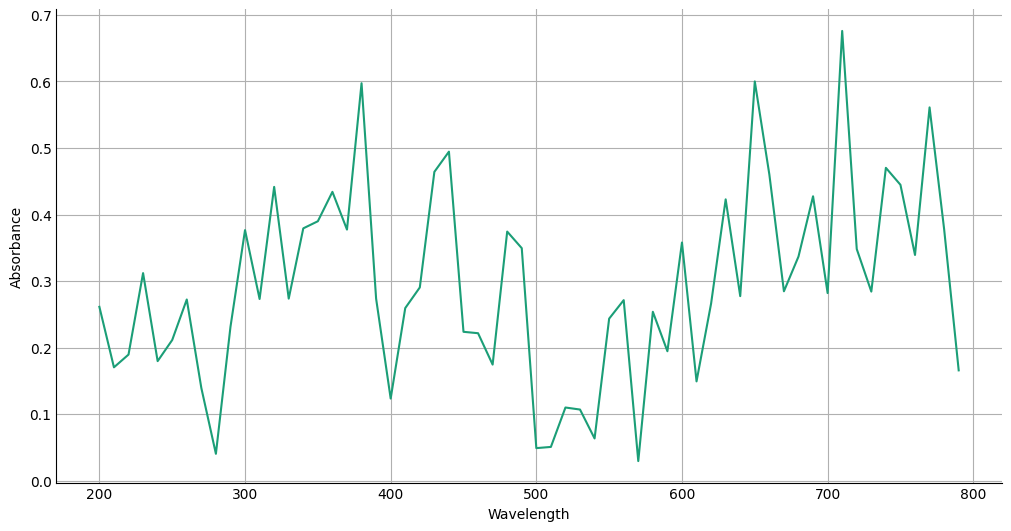

In [133]:
#Recomendation from collab
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Wavelength']
  ys = series['Absorbance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data1
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Wavelength')
_ = plt.ylabel('Absorbance')

[(200.0, 790.0), (-0.12, 1.0)]

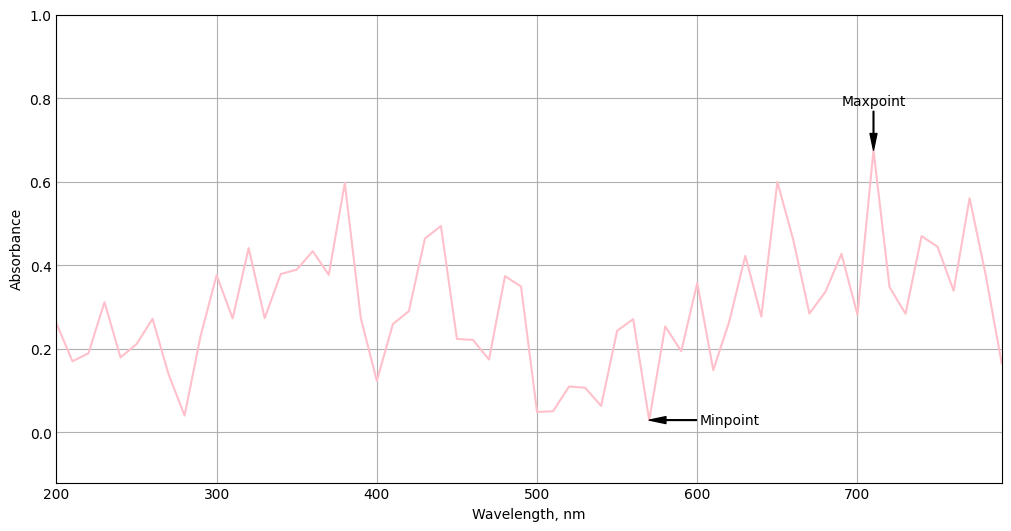

In [134]:
x = data1['Wavelength']
y = data1['Absorbance']
y_max = np.max(y)
x_max = x[np.argmax(y)]
y_min = np.min(y)
x_min = x[np.argmin(y)]
# plot
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
plt.annotate("Maxpoint",(x_max,y_max),(x_max,y_max+0.1), arrowprops=dict(facecolor='black', shrink=0.001,width=0.5,headwidth=5),
            horizontalalignment='center', verticalalignment='bottom')
plt.annotate("Minpoint",(x_min,y_min),(x_min+50,y_min), arrowprops=dict(facecolor='black', shrink=0.001,width=0.5,headwidth=5),
            horizontalalignment='center', verticalalignment='center')
plt.plot(data1['Wavelength'], data1['Absorbance'],color='pink')
plt.xlabel("Wavelength, nm")
plt.ylabel('Absorbance')
ax.set(xlim=(200, 790), ylim=(-0.12, 1))


#Project 5.

Chemical reactor

In [ ]:
import pandas as pd

In [125]:
def concetration_difference(A,B,k):
  dA = -A*k
  dB = A*k
  return [A+dA,B+dB]

def concentration_over_time(A,B,k,t):
  concentrations = pd.DataFrame({"A":A,"B":B}, index=[0])
  for i in range(1,(t+1)):
    A, B = concetration_difference(A,B,k)
    concentrations.loc[i]=[A,B]
  return concentrations

In [126]:
A_start_concentration = input("Add component A:")
B_start_concentration = input("Add product B:")
k_rate = input('Enter k:')
time = input("Enter time of the reaction:")
df = concentration_over_time(A_start_concentration,B_start_concentration,k_rate,time)

,A,B
0,1.000000,0.000000
1,0.900000,0.100000
2,0.810000,0.190000
3,0.729000,0.271000
4,0.656100,0.343900
5,0.590490,0.409510
6,0.531441,0.468559
7,0.478297,0.521703
8,0.430467,0.569533
9,0.387420,0.612580


Text(0, 0.5, 'concentration')

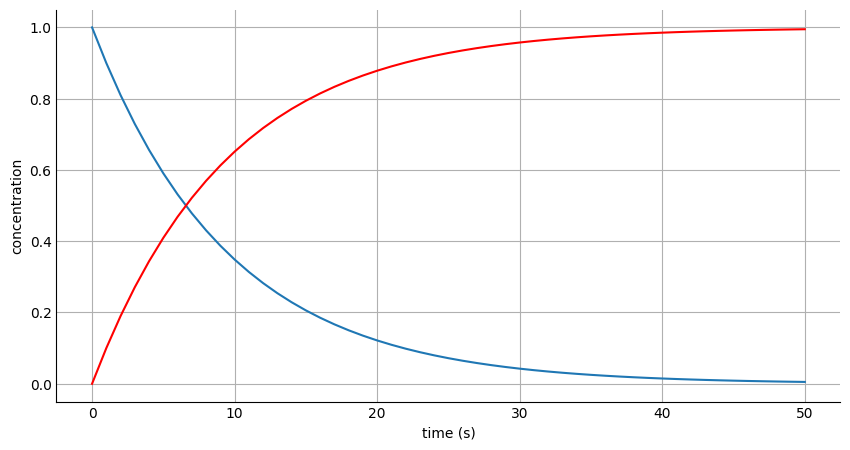

In [135]:
from matplotlib import pyplot as plt
df['A'].plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)
df['B'].plot(kind='line', figsize=(8, 4),color = 'red')
plt.xlabel('time (s)')
plt.ylabel('concentration')